In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/.shortcut-targets-by-id/1_r1ryXDRaCdsR0PFGkkxkbeXFIv5d38H/Project-X-Lip-Reading


In [ ]:
import pickle
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, Activation, MaxPool3D, Reshape, Bidirectional, LSTM, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import pickle

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/y_train.pkl', 'rb') as f:
   y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/y_test.pkl', 'rb') as f:
   y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/X_val.pkl', 'rb') as f:
   X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/y_val.pkl', 'rb') as f:
   y_val = pickle.load(f)

In [ ]:
def create_model():
    model = Sequential()

    model.add(Conv3D(128, 3, input_shape=(28, 100, 100, 1), padding='same', kernel_regularizer=l2(0.01)))
    model.add(Activation('relu'))
    model.add(MaxPool3D((2,2,2)))

    model.add(Conv3D(256, 3, padding='same', kernel_regularizer=l2(0.01)))
    model.add(Activation('relu'))
    model.add(MaxPool3D((2,2,2)))

    model.add(Conv3D(75, 3, padding='same', kernel_regularizer=l2(0.01)))
    model.add(Activation('relu'))
    model.add(MaxPool3D((2,2,2)))

    model.add(Reshape((75, 2*12*12)))

    model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
    model.add(Dropout(0.3))

    model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(10, activation='softmax'))

    return model


In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    shear_range=0.1
)

datagen.fit(X_train)


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1495: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (107, 22, 100, 100) (100 channels).
  warnings.warn(


In [ ]:
model = create_model()

model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_3 (Conv3D)                    │ (None, 22, 100, 100, 128)   │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 22, 100, 100, 128)   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_3 (MaxPooling3D)       │ (None, 11, 50, 50, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_4 (Conv3D)                    │ (None, 11, 50, 50, 256)     │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 11, 50, 50, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_4 (MaxPooling3D)       │ (None, 5, 25, 25, 256)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_5 (Conv3D)                    │ (None, 5, 25, 25, 75)       │         518,475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 5, 25, 25, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_5 (MaxPooling3D)       │ (None, 2, 12, 12, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 75, 288)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 75, 64)              │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 75, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          48,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,069 (5.96 MB)

 Trainable params: 1,562,069 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
t1 = time.time()
plot = model.fit(datagen.flow(X_train, y_train, batch_size=8), validation_data=(X_val, y_val), epochs=22)
t2 = time.time()
print(f"Training time : {t2 - t1} sec")

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:619: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (107, 22, 100, 100) (100 channels).
  warnings.warn(


Epoch 1/22
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 581ms/step - accuracy: 0.2829 - loss: 3.7716 - val_accuracy: 0.3571 - val_loss: 1.7780
Epoch 2/22
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 477ms/step - accuracy: 0.3539 - loss: 1.7774 - val_accuracy: 0.3571 - val_loss: 1.3091
Epoch 3/22
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 491ms/step - accuracy: 0.3580 - loss: 1.3111 - val_accuracy: 0.3571 - val_loss: 1.2185
Epoch 4/22
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 487ms/step - accuracy: 0.2976 - loss: 1.2320 - val_accuracy: 0.3571 - val_loss: 1.1612
Epoch 5/22
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 473ms/step - accuracy: 0.3623 - loss: 1.1830 - val_accuracy: 0.3571 - val_loss: 1.1335
Epoch 6/22
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 462ms/step - accuracy: 0.3827 - loss: 1.1890 - val_accuracy: 0.2857 - val_loss: 1.1682
Epoch 7/22
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 467ms/step - accuracy: 0.2933 - loss: 1.1479 - val_accuracy: 0.5000 - val_loss: 1.1353
Epoch 8/22
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 459ms/step - accuracy: 0.3983 - loss: 1.1341 - val_accurac

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.5385 - loss: 0.9328
Test loss: 0.9328197240829468, Test accuracy: 0.5384615659713745


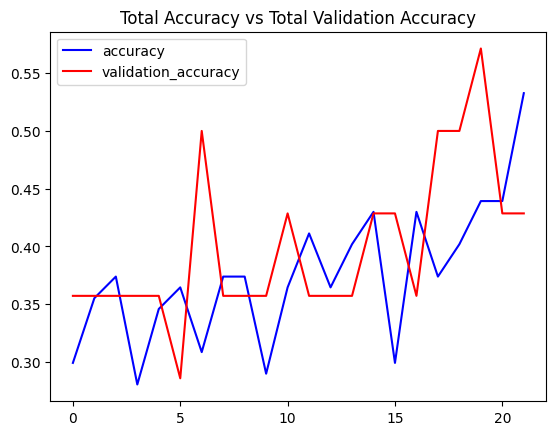

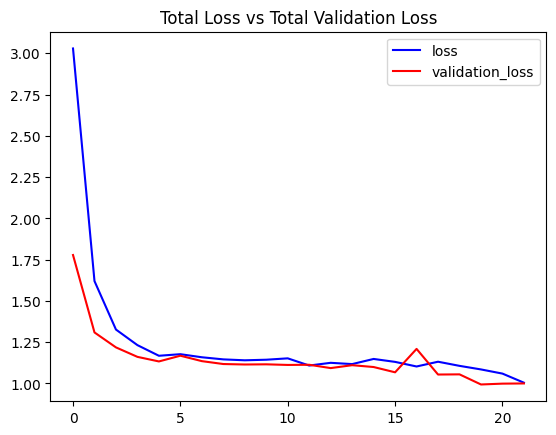

In [ ]:
# Plot accuracy
plt.plot(plot.history['accuracy'], 'blue', label='accuracy')
plt.plot(plot.history['val_accuracy'], 'red', label='validation_accuracy')
plt.title("Total Accuracy vs Total Validation Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.plot(plot.history['loss'], 'blue', label='loss')
plt.plot(plot.history['val_loss'], 'red', label='validation_loss')
plt.title("Total Loss vs Total Validation Loss")
plt.legend()
plt.show()


In [ ]:
# from tensorflow.keras.regularizers import l1
# import numpy as np

# l1_rates = [0.0001, 0.001, 0.01, 0.1]

# for l1_rate in l1_rates:
#     print(f"Testing L1 regularization rate: {l1_rate}")
#     model = create_model_l1(l1_rate)
#     model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

#     t1 = time.time()
#     plot = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=8, verbose=1)
#     t2 = time.time()
#     print(f"Training time : {t2 - t1} sec")

#     test_loss, test_accuracy = model.evaluate(X_test, y_test)
#     print(f"L1 rate: {l1_rate} - Test loss: {test_loss}, Test accuracy: {test_accuracy}")

#     plt.plot(plot.history['accuracy'], label=f'accuracy (L1={l1_rate})')
#     plt.plot(plot.history['val_accuracy'], label=f'validation_accuracy (L1={l1_rate})')
#     plt.title(f"Accuracy vs Validation Accuracy with L1 {l1_rate}")
#     plt.legend()
#     plt.show()

#     plt.plot(plot.history['loss'], label=f'loss (L1={l1_rate})')
#     plt.plot(plot.history['val_loss'], label=f'validation_loss (L1={l1_rate})')
#     plt.title(f"Loss vs Validation Loss with L1 {l1_rate}")
#     plt.legend()
#     plt.show()
